# Unidad 3: Preprocesamiento y visualización

## 2.1 Introducción

A través de gráficos y algunas funciones para preprocesar bases de datos, describiremos el comportamiento subyacente dentro de la relación entre los datos.

## 2.2 Objetivo

Manipular las bases de datos que involucran datos en series de tempo por medio de funciones para explicar el comportamiento regular en un intervalo de tiempo.

## 2.3 Acción

Continuando con la dinámica de la construcción del documento con repositorio en github, se debe incluir en el documento la descomposición, la estacionariedad y la diferenciación, en caso de ser necesarias, de la variable y/o variables seleccionadas con estructura a través del tiempo. Además, si es necesario, se debe implementar alguna transformación con el fin de controlar la tendencia y la variabilidad, de la misma. Debes justificar, el por qué son o no necesarios dichos procedimientos.

### 2.3.1 Preparación de los datos

In [1]:
# importando librerias

# librerias para la transformación de datos
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# libreria para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# recopilación de datos
df_data = pd.read_csv('./dataset.csv',sep=';')
df_data.head()

,fechaoperacion,codigo,contenido,hora1,hora2,hora3,hora4,hora5,hora6,hora7,...,hora15,hora16,hora17,hora18,hora19,hora20,hora21,hora22,hora23,hora24
0,1/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),87.778212,77.778212,77.778212,77.778212,77.778212,77.778212,75.768212,...,75.768212,71.278212,69.067212,76.278212,77.778212,87.778212,87.778212,77.778212,77.778212,77.778212
1,2/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),76.278212,76.278212,76.278212,76.278212,76.278212,76.778212,76.778212,...,82.778212,82.778212,82.778212,81.768212,87.778212,87.778212,87.778212,82.778212,76.778212,76.778212
2,3/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),77.678212,77.678212,77.678212,77.678212,77.678212,77.678212,77.678212,...,82.778212,82.778212,82.778212,82.778212,87.778212,114.425212,87.778212,82.778212,77.678212,77.678212
3,4/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),77.778212,77.778212,77.778212,77.778212,77.778212,77.778212,77.778212,...,77.778212,77.778212,77.778212,85.778212,85.778212,87.778212,85.778212,85.778212,81.768212,77.778212
4,5/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),86.778212,86.778212,86.778212,86.778212,86.778212,86.778212,88.278212,...,88.278212,88.278212,88.278212,88.278212,88.278212,91.134212,88.278212,88.278212,86.778212,86.778212


In [3]:
def trf_data(df_data):
    
    # copia del dataframe
    df = df_data.copy()
    
    # transformación de fechas
    df['fechaoperacion'] = pd.to_datetime(df['fechaoperacion'], format='%d/%m/%Y')
    
    # agregando las columnas de fechas
    df['ano'] = df.apply(lambda x: x['fechaoperacion'].year ,axis=1)
    df['mes'] = df.apply(lambda x: x['fechaoperacion'].month ,axis=1)
    df['dia'] = df.apply(lambda x: x['fechaoperacion'].day ,axis=1)
    
    # selección de columnas
    df = df[['fechaoperacion','ano','mes','dia', 'hora1', 'hora2', 'hora3','hora4', 'hora5', 'hora6', 'hora7', 'hora8', 'hora9', 'hora10','hora11', 'hora12', 'hora13', 'hora14', 'hora15', 'hora16', 'hora17','hora18', 'hora19', 'hora20', 'hora21', 'hora22', 'hora23', 'hora24']]
    
    # Convertir la tabla
    list_id = [i.lower() for i in df.columns if not 'hora' in i]
    list_value = [i.lower() for i in df.columns if 'hora' in i]
    
    # pivotear la tabla
    df = df.melt(id_vars=list_id,value_vars=list_value,var_name='periodo',value_name='valor')
    
    return df

In [4]:
# dataset trasnformado
df = trf_data(df_data)
df.head()

,fechaoperacion,ano,mes,dia,periodo,valor
0,2006-01-01,2006,1,1,hora1,87.778212
1,2006-01-02,2006,1,2,hora1,76.278212
2,2006-01-03,2006,1,3,hora1,77.678212
3,2006-01-04,2006,1,4,hora1,77.778212
4,2006-01-05,2006,1,5,hora1,86.778212


In [5]:
# remuestreando la serie de tiempo a valores mensuales

# creando una copia del dataframe
df_vcm = df.copy()

#  remuestreando el dataframe a mensual
df_vcm = df_vcm.resample('M',on='fechaoperacion').mean().reset_index()
df_vcm = df_vcm[['fechaoperacion','valor']]

# mostrando el dataframe transformado
df_vcm.head()

,fechaoperacion,valor
0,2006-01-31,79.026486
1,2006-02-28,75.520919
2,2006-03-31,65.787447
3,2006-04-30,54.012347
4,2006-05-31,53.819582


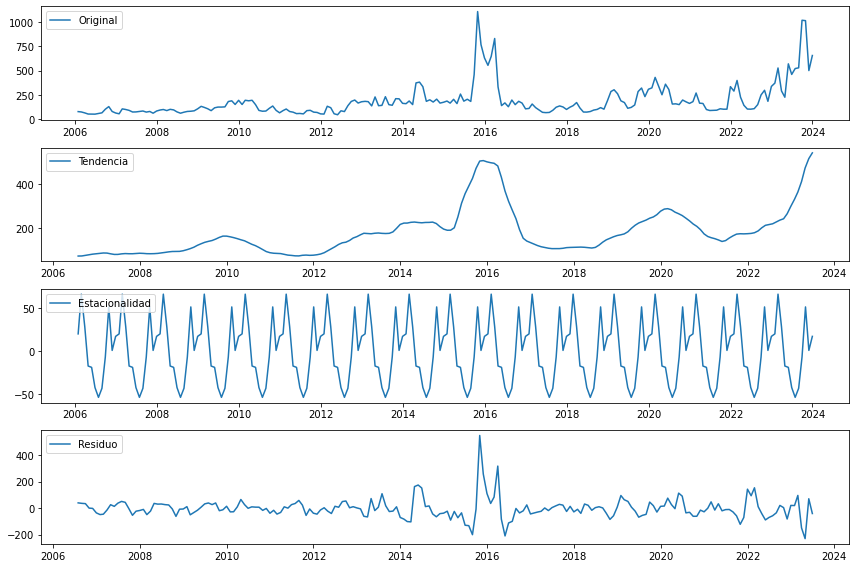

In [6]:
# Establecer 'fechaoperacion' como el índice del DataFrame
df_vcm.set_index('fechaoperacion', inplace=True)

# Asegúrate de que la frecuencia esté definida (por ejemplo, mensual 'M')
df_vcm.index.freq = 'M'

# Realizar la descomposición estacional de la serie temporal
result = seasonal_decompose(df_vcm['valor'], model='additive')

# Graficar la serie original, la tendencia, la estacionalidad y el residuo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_vcm['valor'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Análisis de Descomposición de Serie Temporal

La gráfica mostrada descompone una serie temporal en tres componentes principales: tendencia, estacionalidad y residuo. Aquí se proporciona una interpretación detallada de cada uno de estos componentes.

### 1. **Serie Original**
La serie original muestra fluctuaciones constantes con un notable aumento en la amplitud hacia los años más recientes, sugiriendo una mayor volatilidad o cambios en el comportamiento subyacente.

### 2. **Tendencia**
- **General**: La tendencia muestra un comportamiento estable hasta aproximadamente 2016, seguido por una caída y un posterior aumento significativo hacia el final del período observado.
- **Interpretación**: Este patrón de tendencia podría indicar influencias de factores macroeconómicos, cambios en políticas, o desarrollos en el mercado si los datos son económicos o financieros.

### 3. **Estacionalidad**
- **General**: Se observan fluctuaciones claras y consistentes, indicativas de una fuerte estacionalidad.
- **Interpretación**: La estacionalidad regular podría estar relacionada con ciclos comerciales anuales, comportamientos de consumo estacional, o fenómenos climáticos, dependiendo de la naturaleza de los datos.

### 4. **Residuo**
- **General**: Los residuos presentan un comportamiento errático, con algunos picos significativos.
- **Interpretación**: Los residuos, al no mostrar un patrón claro, indican la ausencia de tendencias y estacionalidades remanentes. Los picos podrían señalar eventos atípicos o externos no capturados por los componentes de tendencia y estacionalidad.

### Conclusión
La descomposición permite entender mejor la estructura subyacente de los datos, separando los efectos de largo plazo, los patrones periódicos y los efectos irregulares. Este análisis es crucial para la modelación precisa de pronósticos y para la toma de decisiones estratégicas y planificación en contextos empresariales o económicos.

In [7]:
# estacionario
adf = adfuller(df_vcm['valor'],maxlag=1)
print('El T-Test es: ',adf[0])
print('El p-value es: ',adf[1])
print('Valores criticos: ',adf[4])

El T-Test es:  -4.2831367549258434
El p-value es:  0.0004750482118971582
Valores criticos:  {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}


# Análisis de la Prueba de Dickey-Fuller Aumentada (ADF)

la prueba de Dickey-Fuller aumentada (ADF) sirve para probar la estacionariedad de una serie temporal.

## Resultados de la prueba ADF:

- **El T-Test es**: `-4.283316754925861`
  Este valor es el estadístico de la prueba y es más negativo que todos los valores críticos proporcionados. Esto indica una fuerte evidencia contra la hipótesis nula de que existe una raíz unitaria en la serie temporal.

- **El p-value es**: `0.0004572081128972734`
  El valor p indica la probabilidad de obtener un resultado al menos tan extremo como el observado, bajo la hipótesis nula. Un valor p bajo (típicamente menor que 0.05) sugiere que puedes rechazar la hipótesis nula de que la serie tiene una raíz unitaria.

- **Valores críticos**:
  `{'1%': -3.4311647822282243, '5%': -2.8578788898898638, '10%': -2.5739861161899027}`
  Estos valores críticos corresponden a los umbrales para los niveles de significancia del 1%, 5% y 10%. Si el estadístico de prueba es más negativo #que uno de estos valores críticos, puedes rechazar la hipótesis nula con ese nivel de confianza.

## Conclusión

En resumen, los resultados de la prueba ADF sugieren que puedes considerar la serie temporal como estacionaria, lo que implica que no tiene raíz unitaria y muestra un comportamiento constante en términos de media y varianza a lo largo del tiempo. Esto es crucial para muchos modelos de análisis y predicción de series temporales.

In [8]:
df_vcm['diff'] = df_vcm['valor'].diff()

df_vcm.head(20)

,valor,diff
fechaoperacion,,
2006-01-31,79.026486,NaN
2006-02-28,75.520919,-3.505567
2006-03-31,65.787447,-9.733472
2006-04-30,54.012347,-11.775100
2006-05-31,53.819582,-0.192766
2006-06-30,52.985621,-0.833961
2006-07-31,59.316403,6.330782
2006-08-31,66.532754,7.216351
2006-09-30,103.448612,36.915858


In [9]:
df_vcm = df_vcm.reset_index()

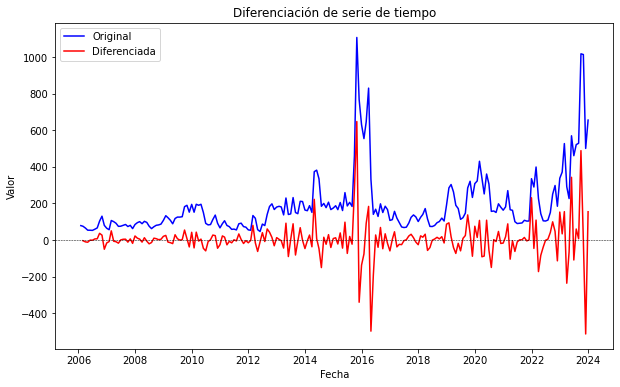

In [10]:
# Crear lienzo
plt.figure(figsize=(10, 6))

# Gráfico de líneas para la serie original
plt.plot(df_vcm['fechaoperacion'], df_vcm['valor'], label='Original', color='blue')

# Gráfico de líneas para la serie diferenciada
plt.plot(df_vcm['fechaoperacion'], df_vcm['diff'], label='Diferenciada', color='red')

# Línea horizontal en y = 0
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# Configuración de título y etiquetas
plt.title('Diferenciación de serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Mostrar gráfico
plt.show()

## Análisis de la Serie de Tiempo

### Comportamiento de la Serie Original:

La serie en azul muestra una **tendencia generalmente estable** al principio, seguido de una **variación más marcada** hacia la segunda mitad del gráfico. Esto podría indicar una serie temporal que experimenta cambios significativos en su comportamiento en el tiempo, posiblemente debido a factores externos, un cambio en la tendencia, o el inicio de un patrón estacional o cíclico.

### Análisis de la Serie Diferenciada:

La serie diferenciada en rojo muestra **fluctuaciones alrededor de cero**, con algunos picos pronunciados. Estos picos representan cambios grandes en los valores de un periodo a otro. Las **diferencias grandes y abruptas** (picos altos tanto positivos como negativos) indican momentos de cambio significativo en la serie temporal, lo cual puede ser útil para detectar anomalías o cambios importantes en la dinámica de los datos.

## Conclusión: Serie Original vs. Serie Diferenciada

### Observaciones Generales

La **serie original** muestra un comportamiento inicialmente estable que se vuelve más variable hacia la segunda mitad del período analizado. Esta variabilidad incrementada puede sugerir la influencia de factores externos, cambios en las tendencias subyacentes, o el inicio de patrones estacionales o cíclicos.

Por otro lado, la **serie diferenciada**, representada en rojo, parece centrarse en torno a cero con variaciones notables (picos). Estas fluctuaciones destacan los momentos de cambios significativos en los valores de la serie de tiempo, que son menos evidentes cuando se observa la serie original.

### Implicaciones para el Análisis y Modelado

1. **Estacionariedad**: La serie diferenciada sugiere un esfuerzo exitoso por estabilizar la media, lo cual es crucial para muchos modelos estadísticos y de machine learning que asumen estacionariedad en la serie temporal.

2. **Detección de Anomalías**: Los picos en la serie diferenciada pueden ser útiles para identificar puntos anómalos o eventos extremos que podrían requerir una investigación más profunda o el desarrollo de modelos específicos para predecir o manejar estos cambios.

3. **Desarrollo de Modelos**: Modelar la serie original sin considerar la diferenciación podría llevar a modelos que no capturan adecuadamente la dinámica subyacente de la serie. Utilizar la serie diferenciada puede proporcionar una base más sólida para la predicción y el análisis, ya que resalta los cambios críticos en la serie temporal.

### Conclusión Final

Comparando ambas series, se concluye que la diferenciación es una herramienta valiosa para revelar aspectos ocultos de la serie temporal que no son aparentes en la serie original. Esto permite un análisis más detallado y un modelado más efectivo de la serie temporal, proporcionando insights clave para la toma de decisiones y la planificación estratégica.